In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_preprocessing as ks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [231]:
#Kaleb Kendall November 2023
data = pd.read_csv("/data/workspace_files/housing.csv")
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


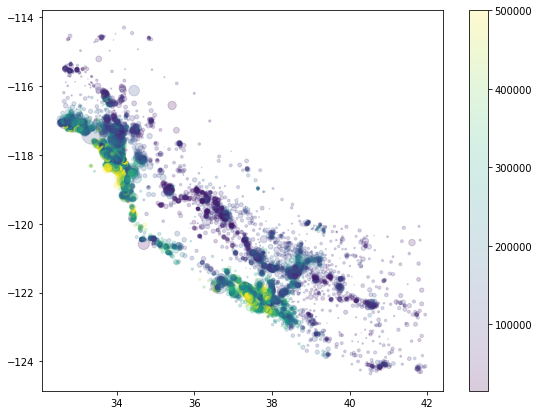

In [232]:
plt.figure( figsize= (9,7))
plt.scatter(data.latitude, data.longitude, alpha = 0.2, c = data.median_house_value, s = data.population/100)
plt.colorbar()

In [233]:
xyz = pd.get_dummies(data.ocean_proximity)
dataCopy = data.join(xyz)

In [234]:
dataCopy = dataCopy.drop("ocean_proximity", axis = "columns")

In [235]:

dataCopy.drop('<1H OCEAN', axis =1)
dataCopy['total_bedrooms'].fillna(dataCopy.total_bedrooms.median(), inplace = True)
dataCopy = dataCopy.dropna()

In [236]:
#data Split
train_pd, test_pd, val_pd = dataCopy[:18000], dataCopy[18000:19217], dataCopy[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1425)

In [237]:
X_train, Y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, Y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, Y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((18000, 13), (18000,), (1425, 13), (1425,), (1217, 13), (1217,))

In [238]:
#preProcessing
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

<Axes: >

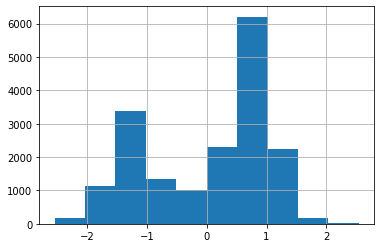

In [239]:
pd.DataFrame(X_train)[0].hist()

In [240]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape,Y_val.shape, Y_test.shape)

(18000, 13) (1425, 13) (1217, 13) (18000,) (1425,) (1217,)


In [241]:
#Linear Model
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, Y_train)
mse(lm.predict(X_train), Y_train, squared=False), mse(lm.predict(X_val), Y_val, squared=False)

(8.960985485876806e-16, 7.793512031540527e-16)

In [242]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, Y_train)
mse(gbr.predict(X_train), Y_train, squared=False), mse(gbr.predict(X_val), Y_val, squared=False)

(0.010787969959846534, 0.04209149282100251)

In [262]:
#Neural Network Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import Dense
#input_dim is equal to # of features, variables you are training on

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=13),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [263]:
model.compile(optimizer="adam", loss = "mae", metrics= keras.metrics.Accuracy())

In [264]:
 

# Compile the model
model.compile(optimizer="adam", loss='mse', metrics='acc')

# Train the model
history = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=50,
    validation_data = (X_val, Y_val)
)

Epoch 1/50
563/563 [==============================] - 6s 9ms/step - loss: 0.4770 - acc: 0.7390 - val_loss: 0.1030 - val_acc: 0.8709
Epoch 2/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1303 - acc: 0.8598 - val_loss: 0.1069 - val_acc: 0.8709
Epoch 3/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1209 - acc: 0.8653 - val_loss: 0.1410 - val_acc: 0.8709
Epoch 4/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1218 - acc: 0.8650 - val_loss: 0.1129 - val_acc: 0.8709
Epoch 5/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1220 - acc: 0.8656 - val_loss: 0.1057 - val_acc: 0.8709
Epoch 6/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1232 - acc: 0.8641 - val_loss: 0.1103 - val_acc: 0.8709
Epoch 7/50
563/563 [==============================] - 5s 8ms/step - loss: 0.1239 - acc: 0.8634 - val_loss: 0.1198 - val_acc: 0.8709
Epoch 8/50
563/563 [==============================] - 4s 8ms/step - loss: 0.

In [265]:
#Evaluation
model.evaluate(X_test, Y_test)[1]

39/39 [==============================] - 0s 3ms/step - loss: 0.1050 - acc: 0.8809


0.8808545470237732

In [266]:
#prediction
prediction = model.predict(X_test)
prediction

39/39 [==============================] - 0s 2ms/step


array([[0.11619825],
 [0.11619825],
 [0.11619825],
 ...,
 [0.11619825],
 [0.11619825],
 [0.11619826]], dtype=float32)

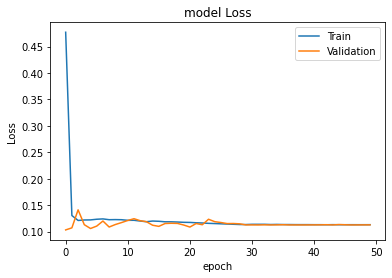

In [267]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc = 'upper right')

In [249]:
#start of Binary Classification

In [250]:
totalMedian = dataCopy.median_house_value.median()
totalMedian

179700.0

In [251]:
aboveMedianPrice =[]
for i in range(len(dataCopy['median_house_value'])):
    # print(dataCopy.median_house_value[i])
    if dataCopy.median_house_value[i] >= totalMedian: aboveMedianPrice.append(0)
    else:
        aboveMedianPrice.append(1)

In [252]:
dataCopy['aboveMedianPriceFinal'] =  aboveMedianPrice

In [253]:
y = dataCopy['aboveMedianPriceFinal']

In [254]:
dataCopy = dataCopy.drop('aboveMedianPriceFinal', axis = 1)

In [255]:
#preprocessing

min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(dataCopy)
X_scale

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0. , 1. ,
 0. ],
 [0.21215139, 0.565356 , 0.39215686, ..., 0. , 1. ,
 0. ],
 [0.21015936, 0.5642933 , 1. , ..., 0. , 1. ,
 0. ],
 ...,
 [0.31175299, 0.73219979, 0.31372549, ..., 0. , 0. ,
 0. ],
 [0.30179283, 0.73219979, 0.33333333, ..., 0. , 0. ,
 0. ],
 [0.30976096, 0.72582359, 0.29411765, ..., 0. , 0. ,
 0. ]])

In [256]:
#Split Data into 80 training, 20%  Testing(10) and Validation (10)
X_train1, X_val_and_test, Y_train1, Y_val_and_test = train_test_split(X_scale,y, test_size=0.2 )
X_val1, X_test1, Y_val1, Y_test1 = train_test_split(X_val_and_test,Y_val_and_test, test_size=0.5)

In [281]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = [14]),
    layers.Dense(564, activation='relu', input_shape=[14]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(564, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),

])

In [282]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [283]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
historyBinaryClass = model.fit(
    X_train1, Y_train1,
    validation_data=(X_val1, Y_val1),
    batch_size=512,
    epochs=1000,
    #callbacks=[early_stopping],
)

Epoch 534/1000
33/33 [==============================] - 1s 23ms/step - loss: 0.0210 - binary_accuracy: 0.9912 - val_loss: 0.0249 - val_binary_accuracy: 0.9903
Epoch 535/1000
33/33 [==============================] - 1s 23ms/step - loss: 0.0198 - binary_accuracy: 0.9915 - val_loss: 0.0214 - val_binary_accuracy: 0.9932
Epoch 536/1000
33/33 [==============================] - 1s 23ms/step - loss: 0.0142 - binary_accuracy: 0.9941 - val_loss: 0.0211 - val_binary_accuracy: 0.9913
Epoch 537/1000
33/33 [==============================] - 1s 23ms/step - loss: 0.0167 - binary_accuracy: 0.9934 - val_loss: 0.0212 - val_binary_accuracy: 0.9927
Epoch 538/1000
33/33 [==============================] - 1s 23ms/step - loss: 0.0189 - binary_accuracy: 0.9921 - val_loss: 0.0237 - val_binary_accuracy: 0.9903
Epoch 539/1000
33/33 [==============================] - 1s 22ms/step - loss: 0.0280 - binary_accuracy: 0.9893 - val_loss: 0.0245 - val_binary_accuracy: 0.9879
Epoch 540/1000
33/33 [========================

Best Validation Loss: 0.0179
Best Validation Accuracy: 0.9956


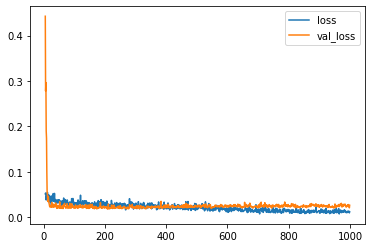

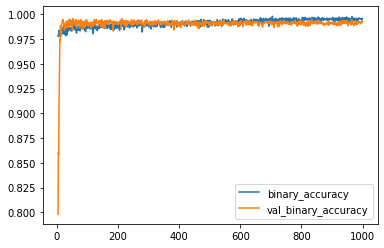

In [284]:
history_df = pd.DataFrame(historyBinaryClass.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))